# Find the relationship between rating and other variables

In [1]:
import json
import os
import matplotlib.pyplot as plt
business_file_path = 'datasets/' + 'raw/business.json'

In [2]:
def remove_attributes(fields, dictionary_list):
    for record in dictionary_list:
        for field in fields:
            del (record[field])

def transpose_single_column_with_or(field, dictionary_list):
    values_set = set()
    for dictionary in dictionary_list:
        values_set |= set(dictionary[field])

    for dictionary in dictionary_list:
        for value in values_set:
            if value in dictionary[field]:
                dictionary[value] = 1
            else:
                dictionary[value] = 0

    return dictionary_list

def transpose_single_column(field, dictionary_list):
    values_set = set()
    for dictionary in dictionary_list:
        values_set.add(dictionary[field])
    for dictionary in dictionary_list:
        for value in values_set:
            if value in dictionary[field]:
                dictionary[value] = 1
            else:
                dictionary[value] = 0
    return dictionary_list

def drop(dictionary_list):
    unwanted = [
        'hours',
        'name',
        'neighborhood',
        'is_open',
        'state',       
        'attributes',
        'business_id',
        'categories',
        'city',
        'address'
    ]
    remove_attributes(unwanted, dictionary_list)

In [3]:
def transform(file_path):
    dicts = [json.loads(line) for line in open(file_path)]
    """
    Making all data numeric:
    transpose matrix, add each possible city as a column, if the business belongs to that city, we put a 1 in that cell, if it doesn't, we put a 0.
    """
    dicts = transpose_single_column_with_or('categories', dicts)
    dicts = transpose_single_column('city', dicts)
    drop(dicts)

    return dicts

In [4]:
dicts = transform(business_file_path)

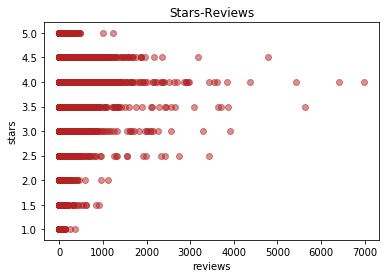

In [22]:
x = [elem['review_count'] for elem in dicts]
y = [elem['stars'] for elem in dicts]

plt.title('Stars-Reviews')
plt.xlabel('reviews')
plt.ylabel('stars')
plt.scatter(x, y, c='firebrick', alpha=0.5)
plt.savefig('stars-reviews.png', format='png', dpi=1200)
plt.show()
plt.gcf().clear()
# in general: more review, higher the stars

('slope', 0.0003)
('Intercept: \n', 3.6382)
RMSE: 0.98


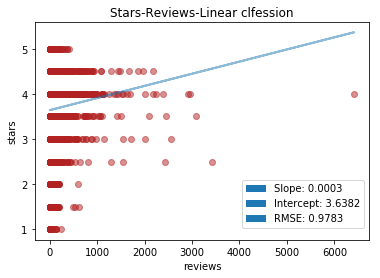

In [60]:
import numpy as np
from sklearn import linear_model
import matplotlib.patches as mpatches

ratings = np.array([elem['stars'] for elem in dicts])
data = np.array([[elem['review_count']] for elem in dicts])
bar = int(len(ratings) * 0.8)
training_data = data[:bar] 
training_ratings = ratings[:bar]
testing_data = data[bar:]
testing_ratings = ratings[bar:]
clf = linear_model.LinearRegression()
clf.fit(training_data, training_ratings)

# The coefficients
slope = float("{0:.4f}".format(clf.coef_[0]))
intercept = float("{0:.4f}".format(clf.intercept_))
rmse = float("{0:.4f}".format((np.mean(
    (clf.predict(testing_data) - testing_ratings) ** 2)) ** 0.5))
patch1 = mpatches.Patch(label='Slope: ' + str(slope))
patch2 = mpatches.Patch(label='Intercept: ' + str(intercept))
patch3 = mpatches.Patch(label='RMSE: ' + str(rmse))
plt.legend(handles=[patch1, patch2, patch3], bbox_to_anchor=(1, 0.3))
plt.title('Stars-Reviews-Linear regression')
plt.xlabel('reviews')
plt.ylabel('stars')
plt.scatter(testing_data, testing_ratings, color='firebrick', alpha=0.5)
plt.plot(testing_data, clf.predict(testing_data), linewidth=2, alpha=0.5)
plt.savefig('stars-reviews.LR.png', format='png', dpi=1200)
plt.show()